# Proyecto: Zona de Cinéfilos - SRP

# EDA

## Importación de Librerías

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import json
from tabulate import tabulate

# Gráficos y Visualización
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import euclidean_distances
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions
import jenkspy
import os
import session_info

# Remueve los límites para el número de columnas desplegadas 
# (en su defecto muestra un separador '...')
# ==============================================================================
pd.set_option("display.max_columns", None)
pd.set_option('format.precision', 2)

# Algunos cálculos estadísticos adicionales
# ==============================================================================
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot# Compara la distribucion de la muestra con una distribucion normal, 
                                                # comprueba si la muestra distribuye normal o no.

# No desplegar advertencias
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

print ('La carga se ha realizado con éxito!')

La carga se ha realizado con éxito!


In [12]:
#m_df=pd.read_csv('movie_metadata.csv')
m_df = pd.read_excel('dfwork.xlsx', sheet_name='Sheet1')

## Función que genera un primer reporte tipo EDA del df.

Hecho el ETL, que implicó muchos cambios y transformaciones, procedemos a mirar los datos, peroesta vez, con un propósio más funcional a los objetivos de proyecto.

La siguiente fución, permite presentar una serie de consultas individuales, comoun reporte, que aporta algunos adicionales al analista. (Nota: Hallado por ahí y mejorado) 

In [13]:
# Función que permite generar un informe para el análisis del dataframe

def f_creaReporte(dataframe, nombre):
    """
    Función que permite generar un informe EDA del dataframe
    
    Recibe como parámetros, un dataframe y una cadena de texto 
    con el nombre o descripción del set de datos. 
    
    Retorna:
    
        a) Nombre del DF, número de registros y columnas
        
        b) Si el dataset tiene duplicados y cuántos.
        
        b) 2 registros de muestra, tomados al azar.
        
        c) Nombres de las columnas
        
        d) Estadísticas básicas de las columnas numéricas
        
        e) Valores únicos por cada columna
        
        f) Porcentaje de nulos por cada columna
        
        g) Estadísticas básicas de las columnas categóricas
        
        h) Tabla descriptiva del set de datos
    
    """
    print(f"RESUMEN ANÁLISIS EXPLORATORIO DE DATOS: {nombre.upper()}")
    print("-"*50)
    print(f"El DF tiene {dataframe.shape[0]} registros y {dataframe.shape[1]} columnas")
    print("-"*50)
    if dataframe.duplicated().sum() == 0: 
        print('El dataset no tiene duplicados')
    else:
        print(f"El DF tiene {dataframe.duplicated().sum()} registros duplicados") 
    print("-"*50)
    print("Para chequear estructura y tipos de datos, se muestran cinco (2) filas seleccionadas al azar:")
    display(dataframe.sample(2).style.background_gradient(cmap='Oranges_r').set_properties(**{'font-family': 'Segoe UI'}).hide_index())
    print("-"*50)
    print(f"El dataframe {nombre} tiene las siguientes columnas y tipos de datos:")
    for i, col in enumerate(dataframe.columns, start=1):
        print(i,') ',col, type(dataframe[col].iloc[0]))
    print("-"*50)
    print("Las estadísticas básicas de las variables numéricas son:")
    display(dataframe.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='Oranges_r').set_properties(**{'font-family': 'Segoe UI'}))
    print("-"*50)
    print("El numero de valores distintos de cada columna es:")
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(col, len(dataframe[col].value_counts()))
        else:
            print(col, len(dataframe[col].value_counts()))
            print(f"Los valores son: {dataframe[col].unique()}")
    print("-"*50)
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("-"*50)
    print("Las estadísticas básicas de las variables categóricas son:")
    display(dataframe.select_dtypes(include='object').describe().T.style.background_gradient(cmap='Oranges_r').set_properties(**{'font-family': 'Segoe UI'}))
    print("-"*50)
    print("Tabla descriptiva que incluye todas las variables:")
    display(dataframe.describe(include='all').style \
  .format(precision=2, thousands=",", decimal=".").background_gradient(cmap='Oranges_r').set_properties(**{'font-family': 'Segoe UI'}))

In [14]:
# Ejecutar reporte descriptivo

# Esta función puede ser sustuída por la ejecución independiente de los comandos que 
# generan la misma información, tales como: info, head, tail, sample, describe, sin embargo,
# esta agrega un cálculo adicional sobre la composición de nulos por columna y otros detalles 
# que contribuyen al análisis.

f_creaReporte(m_df, "'Zona de Cinéfilos'")

RESUMEN ANÁLISIS EXPLORATORIO DE DATOS: 'ZONA DE CINÉFILOS'
--------------------------------------------------
El DF tiene 45355 registros y 25 columnas
--------------------------------------------------
El DF tiene 4 registros duplicados
--------------------------------------------------
Para chequear estructura y tipos de datos, se muestran cinco (2) filas seleccionadas al azar:


id,imdb_id,title,pais,release_date,status,overview,tagline,release_year,release_month,release_day,release_weekday,director,elenco,productora,original_language,runtime,revenue,budget,return,vote_average,vote_count,popularity,critica_cine,generos
174865,tt0060818,Penelope,USA,1966-11-10 00:00:00,Released,"When James met Penelope at a club, it took all of three weeks before they were married. But after the marriage, other women became attracted to James and he kept getting promoted, which took him away from Penelope. So Penelope puts on a disguise and robs her husband""s bank. Her psychiatrist, Greg, believes that this condition is caused by James being over worked and under romantic with Penelope. She also tells Greg that she robs the business associates of James. But Greg is in love with Penelope - in fact everyone likes her. The problem is when she confesses to her crimes, no one believes her.",The worlds most beautiful bank-robber,1966,11,10,4,Arthur Hiller,"Natalie Wood, Ian Bannen, Dick Shawn, Peter Falk, Jonathan Winters, Lila Kedrova, Lou Jacobi, Norma Crane, Arthur Malet, Jerome Cowan, Arlene Golonka, Amzie Strickland, Bill Gunn, Carl Ballantine, Iggie Wolfington",Euterpe,en,97,0,4000000,0.00,6.80,4,1.38,9,"Comedy, Crime"
149150,tt1482194,Melody for a Street Organ,Ukraine,2009-06-21 00:00:00,Released,"Two young orphan siblings travel to Moscow in search of their missing father. Scared of being separated and sent to orphanages, they hope to reunite with the last link of their shattered family.",Sin dato,2009,6,21,7,Kira Muratova,"Lena Kostyuk, Roma Burlaka, Natalya Buzko, Zhan Daniel, Georgiy Deliev, Yevgeni Golubenko, Leonid Kushnir, Renata Litvinova, Nina Ruslanova, Oleg Tabakov",Sota Cinema Group,ru,153,0,0,0.00,5.40,5,0.39,1,Drama


--------------------------------------------------
El dataframe 'Zona de Cinéfilos' tiene las siguientes columnas y tipos de datos:
1 )  id <class 'numpy.int64'>
2 )  imdb_id <class 'str'>
3 )  title <class 'str'>
4 )  pais <class 'str'>
5 )  release_date <class 'datetime.datetime'>
6 )  status <class 'str'>
7 )  overview <class 'str'>
8 )  tagline <class 'str'>
9 )  release_year <class 'numpy.int64'>
10 )  release_month <class 'numpy.int64'>
11 )  release_day <class 'numpy.int64'>
12 )  release_weekday <class 'numpy.int64'>
13 )  director <class 'str'>
14 )  elenco <class 'str'>
15 )  productora <class 'str'>
16 )  original_language <class 'str'>
17 )  runtime <class 'numpy.int64'>
18 )  revenue <class 'numpy.int64'>
19 )  budget <class 'numpy.int64'>
20 )  return <class 'numpy.float64'>
21 )  vote_average <class 'numpy.float64'>
22 )  vote_count <class 'numpy.int64'>
23 )  popularity <class 'numpy.float64'>
24 )  critica_cine <class 'numpy.int64'>
25 )  generos <class 'str'>
--------

,count,mean,std,min,25%,50%,75%,max
id,45355.00,108026.27,112170.75,2.00,26386.50,59858.00,156538.00,469172.00
release_year,45355.00,1991.88,24.06,1874.00,1978.00,2001.00,2010.00,2020.00
release_month,45355.00,6.46,3.63,1.00,3.00,7.00,10.00,12.00
release_day,45355.00,14.21,9.28,1.00,6.00,14.00,22.00,31.00
release_weekday,45355.00,4.18,1.64,1.00,3.00,4.00,5.00,7.00
runtime,45355.00,93.67,38.86,0.00,85.00,95.00,107.00,1256.00
revenue,45355.00,11235288.05,64404410.50,0.00,0.00,0.00,0.00,2787965087.00
budget,45355.00,4234526.00,17443667.05,0.00,0.00,0.00,0.00,380000000.00
return,45355.00,660.35,74710.58,0.00,0.00,0.00,0.00,12396383.00
vote_average,45355.00,5.62,1.92,0.00,5.00,6.00,6.80,10.00


--------------------------------------------------
El numero de valores distintos de cada columna es:
id 45338
imdb_id 45325
title 42189
pais 2757
release_date 17329
status 7
Los valores son: ['Released' 'Sin dato' 'Rumored' 'Post Production' 'In Production'
 'Planned' 'Canceled']
overview 44224
tagline 20262
release_year 135
release_month 12
Los valores son: [10 12  2 11  9  5  4  8  7  6  1  3]
release_day 31
release_weekday 7
Los valores son: [1 5 4 3 6 2 7]
director 14331
elenco 34034
productora 13374
original_language 89
runtime 353
revenue 6863
budget 1223
return 5232
vote_average 92
vote_count 1820
popularity 43723
critica_cine 576
generos 911
--------------------------------------------------
El porcentaje de nulos por columna:
id: 0.0
imdb_id: 0.0
title: 0.0
pais: 0.0
release_date: 0.0
status: 0.0
overview: 0.0
tagline: 0.0
release_year: 0.0
release_month: 0.0
release_day: 0.0
release_weekday: 0.0
director: 0.0
elenco: 0.0
productora: 0.0
original_language: 0.0
runtime: 0.0
re

,count,unique,top,freq
imdb_id,45355,45325,tt0000000,14
title,45355,42189,Cinderella,11
pais,45355,2757,USA,14137
release_date,45355,17329,2008-01-01 00:00:00,136
status,45355,7,Released,44916
overview,45355,44224,Sin dato,946
tagline,45355,20262,Sin dato,24972
director,45355,14331,Sin dato,11292
elenco,45355,34034,Sin dato,11300
productora,45355,13374,Sin dato,11911


--------------------------------------------------
Tabla descriptiva que incluye todas las variables:


,id,imdb_id,title,pais,release_date,status,overview,tagline,release_year,release_month,release_day,release_weekday,director,elenco,productora,original_language,runtime,revenue,budget,return,vote_average,vote_count,popularity,critica_cine,generos
count,"45,355.00","45,355","45,355","45,355","45,355","45,355","45,355","45,355","45,355.00","45,355.00","45,355.00","45,355.00","45,355","45,355","45,355","45,355","45,355.00","45,355.00","45,355.00","45,355.00","45,355.00","45,355.00","45,355.00","45,355.00","45,355"
unique,nan,"45,325","42,189","2,757","17,329",7,"44,224","20,262",nan,nan,nan,nan,"14,331","34,034","13,374",89,nan,nan,nan,nan,nan,nan,nan,nan,911
top,nan,tt0000000,Cinderella,USA,2008-01-01 00:00:00,Released,Sin dato,Sin dato,nan,nan,nan,nan,Sin dato,Sin dato,Sin dato,en,nan,nan,nan,nan,nan,nan,nan,nan,Sin dato
freq,nan,14,11,"14,137",136,"44,916",946,"24,972",nan,nan,nan,nan,"11,292","11,300","11,911","32,191",nan,nan,nan,nan,nan,nan,nan,nan,"11,289"
mean,"108,026.27",nan,nan,nan,nan,nan,nan,nan,"1,991.88",6.46,14.21,4.18,nan,nan,nan,nan,93.67,"11,235,288.05","4,234,526.00",660.35,5.62,110.14,2.93,34.96,nan
std,"112,170.75",nan,nan,nan,nan,nan,nan,nan,24.06,3.63,9.28,1.64,nan,nan,nan,nan,38.86,"64,404,410.50","17,443,667.05","74,710.58",1.92,491.85,6.01,68.16,nan
min,2.00,nan,nan,nan,nan,nan,nan,nan,"1,874.00",1.00,1.00,1.00,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
25%,"26,386.50",nan,nan,nan,nan,nan,nan,nan,"1,978.00",3.00,6.00,3.00,nan,nan,nan,nan,85.00,0.00,0.00,0.00,5.00,3.00,0.39,0.00,nan
50%,"59,858.00",nan,nan,nan,nan,nan,nan,nan,"2,001.00",7.00,14.00,4.00,nan,nan,nan,nan,95.00,0.00,0.00,0.00,6.00,10.00,1.13,10.00,nan
75%,"156,538.00",nan,nan,nan,nan,nan,nan,nan,"2,010.00",10.00,22.00,5.00,nan,nan,nan,nan,107.00,0.00,0.00,0.00,6.80,34.00,3.69,36.00,nan


## Conteo de valores que se repiten en la columna 'title'

In [15]:
# Conteo de valor únicos y títulos que se repiten, aún cuando son
# producciones diferentes

qttyPelis = 5

# Obtener el recuento de valores en la columna
conteo_x_peli = m_df['title'].value_counts()

# Filtrar los registros que tienen más de un valor
filtro_pelis_igual_nombre = conteo_x_peli[conteo_x_peli > qttyPelis]

# Mostrar los registros que acumulan más de un valor
print(filtro_pelis_igual_nombre)

# Insight: Son 2328 películas (apróx. 5% del total) que registran, al menos, un repetición, 
#          esto podría incidir en nuestro algoritmo de recomendación, pero el efecto individual
#          es despreciable. La película que más se repite es " Cinderella" (Cenicienta), con 11 
#          apariciones.

Cinderella                       11
Hamlet                            9
Alice in Wonderland               9
Beauty and the Beast              8
Les Misérables                    8
A Christmas Carol                 7
Treasure Island                   7
The Three Musketeers              7
The Hunters                       6
Wuthering Heights                 6
The Forest                        6
Mother                            6
Love                              6
Jane Eyre                         6
Macbeth                           6
The Hound of the Baskervilles     6
Countdown                         6
Bluebeard                         6
The Circle                        6
Home                              6
First Love                        6
The Journey                       6
Aftermath                         6
Heidi                             6
The Stranger                      6
Name: title, dtype: int64


# Detectar valores nulos, NaN, NA, None

Si bien el archivo parece no tener problemas, al buscar por subcadena, retorna un error de valores booleanos, nan o null.

El error, sólo impide hacer búsquedas por subcadenas y no son inhabilitantes para las funcionalidades requeridas, pero intentaremos solucionarlo igualmente.

In [ ]:
# Analicemos las películas de "Cenicienta"

consulta_substr = m_df[m_df['title'].str.contains("Cinder")]
consulta_substr

# Insight : Genera un error (ValueError: Cannot mask with non-boolean 
#           array containing NA / NaN values). Se explica el problema
#           como parte de la base de conocimiento, afectó el análisis, 
#           pero no afecta el resultado.

In [17]:
# Función para detectar problemas con tipo de datos y valores nulos, NaN, NA

def validar_valores(df):
    errores = {}
    for columna in df.columns:
        lista_errores = []
        for indice, valor in enumerate(df[columna]):
            if pd.isnull(valor) or valor is None or (isinstance(valor, float) and np.isnan(valor)):
                lista_errores.append(indice)
            elif indice > 0 and type(valor) != type(df[columna][indice-1]):
                lista_errores.append(indice)
        if lista_errores:
            errores[columna] = lista_errores
    return errores

In [ ]:
# Aplicar la función.

validar_valores(m_df)

# Insight: Si se reusa la función, se sugiere, correrla una vez, individualizar los nombres de las
#          columnas que aparecen y luego, generar las variables para que se almacenen las listas
#          con los nombres de las columnas, y así poder trabajar las listas por separado, 
#          omití ese paso, porque no aportaba al trabajo, pero me pareció valioso dejar la función 
#          para usos futuros. 

In [ ]:
# Un intento para eliminar posibles valores que provocan problemas
# al hacer búsquedas por cadenas, fue crear una fx que reemplaza los
# valores no deseados y conserva el registro, me interesa preservar 
# la mayor cantidad de registros posibles para análisis.
#
# Como prueba de concepto, se analizó la columna 'title' que arroja un 
# error NAN/NONE/Boolean, al buscar por subcadena.
 
# Intentamos resolver esto, antes de buscar y analizar cadenas 
# de texto en 'title'.

def reemplazar_valores(df, columna):
    def reemplazar_valor(valor):
        if pd.isnull(valor) or valor is None or isinstance(valor, float) and np.isnan(valor):
            return "Sin dato"
        else:
            return valor

    df[columna] = df[columna].apply(reemplazar_valor)
    return df

m_df['title2'] = reemplazar_valores(m_df,'title')

# Insight : No genera la mejora esperada, al parecer, los objetos
#           json anidados, tienen valores none, que provocan el problema.

In [ ]:
# Genera una columna de prueba, con los valores corregidos
# y no se observa cambio al hacer la búsqueda, se explica en 
# la celda anterior.

len(m_df.title2)

In [ ]:
# Lista las 11 pelis de Cenicienta.
# Lo importante es saber si las películas con el mismo
# nombre, pero distinta popularidad o valoración pueden
# afectar la predicción. La hipótesis es que: La variables
# predictoras podrán diferenciar una película con características
# similares, más allá de tener el mismo nombre.

por_nombre = m_df[m_df['title2'] == 'Cinderella' ]
por_nombre

In [52]:
# Completar valores nulos por 'Sin dato'
m_df["production_companies"].fillna("Sin dato", inplace = True)

In [53]:
# Completar valores nulos por 'Sin dato'
m_df["production_countries"].fillna("Sin dato", inplace = True)

In [54]:
# Completar valores nulos por 'Sin dato'
m_df["genres"].fillna("Sin dato", inplace = True)

In [55]:
# Completar valores nulos por el promedio
m_df["budget"].fillna(m_df["budget"].median(),inplace=True)

In [56]:
# Revisamos nuevamente que no existan valores nulos, excepto los anidados.
m_df.isna().sum()

# Insight: No se observan valores nulos, no obstante, se sabe que en los valores anidados, si los hay 
#          y se debe considerar al momento de hacer consultas.

id                      0
title                   0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
release_year            0
release_month           0
release_day             0
num_dia                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_average            0
vote_count              0
budget                  0
revenue                 0
return                  0
director                0
elenco                  0
title2                  0
dtype: int64

In [22]:
# Buscamos duplicados

len(m_df[m_df.duplicated()]), m_df[m_df.duplicated()]

# Insight : Se detectan 17 duplicados

(4,
            id    imdb_id                             title  \
 35735  159849  tt0173769  Why We Fight: Divide and Conquer   
 38797   99080  tt0022537                        The Viking   
 40194   97995  tt0127834              Seven Years Bad Luck   
 45157  265189  tt2121382                     Force Majeure   
 
                                   pais         release_date    status  \
 35735                         Sin dato  1943-01-01 00:00:00  Released   
 38797                      Canada, USA  1931-06-21 00:00:00  Released   
 40194                      USA, France  1921-02-06 00:00:00  Released   
 45157  Sweden, France, Norway, Denmark  2014-08-15 00:00:00  Released   
 
                                                 overview  \
 35735  The third film of Frank Capra"s "Why We Fight"...   
 38797  Originally called White Thunder, American prod...   
 40194  After breaking a mirror in his home, superstit...   
 45157  While holidaying in the French Alps, a Swedish...   
 


## Eliminar duplicados

In [23]:
# Se eliminan los duplicados

m_df.drop_duplicates(inplace=True)

# Se eliminan los 17 registros duplicados
# De los 45378 registros originales, quedan 45361

In [24]:
m_df.shape

(45351, 25)

In [25]:
# Revisamos otras variables que pueden presentar dominancia por la cantidadad de
# repeticiones

m_df["original_language"].value_counts()

en    32188
fr     2436
it     1527
ja     1349
de     1077
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

In [26]:
# Más del 70% de los datos son en idioma inglés, por lo que resulta poco 
# recomendable incluirlo en el modelo, se procede a dropear la columna lenguajes.

m_df.drop('original_language',axis=1,inplace=True)

## Crear columna return

In [87]:
# Crear columna 'return'. 
# Se agrega la columna calculando la utilidad (revenue), sobre la inversión (budget).
# Valida que ambos valores sean eneros positivos y controla el error con un try y except
# El cálculo se hizo en Excel, pero se deja expresada la función para futuros usos.
# Nota: El retorno sobre la inversión, se calcula sobre el la utilidad (ingresos - costo)
#       En este caso, se solicitó como ingresos/presupuesto, que se conoce como índice de
#       rentabilidad, ROC (return over costs), y no como ROI.

def calc_roi(df, col_revenue, col_budget):
    """
    Recibe: El nombre del df, nombre de la columna que contiene el revenue (ingresos)
    nombre de la columna que contiene el budget (presupuesto o costo).
        
    """
    df['return'] = 0         # Crear columna 'return' con ceros
    
    for i in range(len(df)):
        try:
            revenue = df.loc[i, col_revenue]
            budget  = df.loc[i, col_budget]
            
            # Validar que ambos valores sean enteros positivos
            if isinstance(revenue, int) and revenue > 0 and isinstance(budget, int) and budget > 0:
                df.loc[i, 'return'] = (revenue / budget)*100
        except ZeroDivisionError:
            df.loc[i, 'return'] = 0  # Si el resultado de la división genera error, reemplaza por un 0
    
    return df


In [68]:
# Análisis de la columna países
 
value_counts = m_df["production_countries"].value_counts()
value_counts

{"iso_3166_1": "US", "name": "United States of America"}                                                                                                          17842
{"iso_3166_1": "XX", "name": "No Country"}                                                                                                                         6210
{"iso_3166_1": "GB", "name": "United Kingdom"}                                                                                                                     2235
{"iso_3166_1": "FR", "name": "France"}                                                                                                                             1653
{"iso_3166_1": "JP", "name": "Japan"}                                                                                                                              1356
                                                                                                                                                                

In [73]:
# Observamos los 5 valores más altos, como porcentaje del total

value_counts = m_df['production_countries'].value_counts(normalize=True).mul(100)
vals = value_counts[:5] #.index
vals

# Insight : En el peor caso, si el análisis apunta a que la variable gravita en la
# predicción, se buscaría agrupar los valores en 3 categorías, en su defecto, se 
# dropeará la columna.

{"iso_3166_1": "US", "name": "United States of America"}    39.333348
{"iso_3166_1": "XX", "name": "No Country"}                  13.690174
{"iso_3166_1": "GB", "name": "United Kingdom"}               4.927140
{"iso_3166_1": "FR", "name": "France"}                       3.644100
{"iso_3166_1": "JP", "name": "Japan"}                        2.989352
Name: production_countries, dtype: float64

***Insight:*** Más del 50% se concentra entre USA y 'No Country', el resto de países tienen una presencia poco significante.
         Se eliminará esta columna que tampoco es usada para otras consultas.

In [75]:
m_df.head(1)

,id,title,genres,popularity,production_companies,production_countries,release_date,release_year,release_month,release_day,num_dia,runtime,spoken_languages,status,tagline,vote_average,vote_count,budget,revenue,return,director,elenco,title2
0,862,Toy Story,"{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""n...",21.946943,"{""name"": ""Pixar Animation Studios"", ""id"": 3}","{""iso_3166_1"": ""US"", ""name"": ""United States of...",1995-10-30,1995,10,30,1,81,"{""iso_639_1"": ""en"", ""name"": ""English""}",Released,Sin dato,7.7,5415,30000000,373554033,1245.18011,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Toy Story


In [80]:
# Dropear columnas que no se usarán para consultas o recomendación

m_df.drop(['production_companies','production_countries', 'spoken_languages', 'status','tagline','title2'], axis=1,inplace=True)
m_df.head(2)

,id,title,genres,popularity,release_date,release_year,release_month,release_day,num_dia,runtime,vote_average,vote_count,budget,revenue,return,director,elenco
0,862,Toy Story,"{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""n...",21.946943,1995-10-30,1995,10,30,1,81,7.7,5415,30000000,373554033,1245.18011,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,8844,Jumanji,"{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""n...",17.015539,1995-12-15,1995,12,15,5,104,6.9,2413,65000000,262797249,404.30346,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."


In [81]:
#Value count of genres
m_df['genres'].value_counts()

{"id": 18, "name": "Drama"}                                                                                                                                                                              4997
{"id": 35, "name": "Comedy"}                                                                                                                                                                             3620
{"id": 99, "name": "Documentary"}                                                                                                                                                                        2712
{"id": 999999, "name": "Sin dato"}                                                                                                                                                                       2384
{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}                                                                                                                   

In [83]:
# Agregar corchetes columna 'genres'
# Paso previo a tratar de separarlos, porque da algunos errores con split

def agrega_corchetes(df, columna):
    nueva_col = []
    
    for valor in df[columna]:
        if pd.isnull(valor):
            nueva_col.append('[{"name": "Sin dato"}]')
        else:
            try:
                json_valor = json.loads(valor)
                nueva_col.append(f'[{json.dumps(json_valor)}]')
            except ValueError:
                nueva_col.append(f'[{valor}]')
    
    df['col_corregida'] = nueva_col
    return df

# Aplicamos sobre  m_df
m_df = agrega_corchetes(m_df, 'genres')
print(m_df.head(2))


     id      title                                             genres  \
0   862  Toy Story  {"id": 16, "name": "Animation"}, {"id": 35, "n...   
1  8844    Jumanji  {"id": 12, "name": "Adventure"}, {"id": 14, "n...   

   popularity release_date  release_year  release_month  release_day  num_dia  \
0   21.946943   1995-10-30          1995             10           30        1   
1   17.015539   1995-12-15          1995             12           15        5   

   runtime  vote_average  vote_count    budget    revenue      return  \
0       81           7.7        5415  30000000  373554033  1245.18011   
1      104           6.9        2413  65000000  262797249   404.30346   

        director                                             elenco  \
0  John Lasseter  Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...   
1   Joe Johnston  Robin Williams, Jonathan Hyde, Kirsten Dunst, ...   

                                       col_corregida  
0  [{"id": 16, "name": "Animation"}, {"id": 35,

## Elimina columna 'genres' y cambia nombre de columna 'col_corregida'

In [84]:
# Elimina columna 'genres' y cambia nombre de columna 'col_corregida' a 'genres'
m_df.drop('genres',axis=1,inplace=True)

m_df.rename(columns={'col_corregida':'genres'}, inplace = True) 
m_df.head(1)

,id,title,popularity,release_date,release_year,release_month,release_day,num_dia,runtime,vote_average,vote_count,budget,revenue,return,director,elenco,genres
0,862,Toy Story,21.946943,1995-10-30,1995,10,30,1,81,7.7,5415,30000000,373554033,1245.18011,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""..."


## Identifica lista de géneros

In [111]:
# Plan B : Identificar los géneros sin necesidad de una función
lst_generos = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
                'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
                'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

In [85]:
mdf_test = m_df.copy()
mdf_test.head(1)

,id,title,popularity,release_date,release_year,release_month,release_day,num_dia,runtime,vote_average,vote_count,budget,revenue,return,director,elenco,genres
0,862,Toy Story,21.946943,1995-10-30,1995,10,30,1,81,7.7,5415,30000000,373554033,1245.18011,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""..."


In [105]:
# Obtener los registros únicos de la columna 'col_json'
registros = mdf_test['genres'].explode().unique()
registros

array(['[{"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
       '[{"id": 10749, "name": "Romance"}, {"id": 35, "name": "Comedy"}]',
       ...,
       '[{"id": 80, "name": "Crime"}, {"id": 35, "name": "Comedy"}, {"id": 28, "name": "Action"}, {"id": 10751, "name": "Family"}]',
       '[{"id": 28, "name": "Action"}, {"id": 9648, "name": "Mystery"}, {"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}]',
       '[{"id": 10751, "name": "Family"}, {"id": 16, "name": "Animation"}, {"id": 10749, "name": "Romance"}, {"id": 35, "name": "Comedy"}]'],
      dtype=object)

In [106]:
reg_json = [{"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 10751, "name": "Family"}]

reg_lst = [item["name"] for item in reg_json]

print(reg_lst)

['Animation', 'Comedy', 'Family']


In [114]:
# Convertir la columna en formato JSON
mdf_test['genres'] = mdf_test['genres'].apply(lambda x: pd.Series(x)).to_json(orient='records')

In [ ]:
mdf_test.info()


In [86]:
# Función que convierte celda anidada en columnas

def dividir_columna(df, col_json):
    # Crear un nuevo dataframe con las columnas necesarias
    new_df = pd.DataFrame()
    new_df['id']    = df['id']
    new_df['title'] = df['title']

    # Recorrer la columna col_rec
    for i, value in enumerate(df[col_json]):
        # Verificar si el valor es NaN
        if pd.notnull(value):
            # Convertir el valor en un diccionario
            diccionario = eval(str(value))

            # Dividir el diccionario en columnas clave:valor
            for key, val in diccionario.items():
                new_df[f'{key}_{i}'] = val

    return new_df


In [ ]:
dividir_columna(mdf_test, 'genres')

In [97]:
mdf_test = mdf_test.reset_index(drop=True)

In [98]:
# Agregar cols al df
import pandas as pd

import pandas as pd
import json

def crear_columnas_json(df_input, col_json):
    # Obtener los registros únicos de la columna 'col_json'
    registros = set()
    for lista_json in df_input[col_json]:
        # Verificar si el valor es una cadena JSON válida
        try:
            json_data = json.loads(lista_json)
            registros.update(list(json_data.keys()))
        except (json.JSONDecodeError, AttributeError):
            continue
    
    # Iterar sobre los registros únicos y crear las columnas correspondientes
    for registro in registros:
        # Verificar si la columna ya existe en el DataFrame
        columna = f"{col_json}_{registro}"
        if columna not in df_input.columns:
            # Crear la columna a partir del arreglo JSON
            df_input[columna] = df_input[col_json].apply(lambda x: json.loads(x)[registro] if isinstance(x, str) else None)
    
    return df_input




In [ ]:
mdf_test.shape

In [ ]:
mdf_test.to_excel(r'D:/BootcampHDS/M07_ProyInd/PI_DSPT01_0623/ML/testML260623.xlsx', index=False)

In [ ]:
crear_columnas_json(mdf_test, 'genres')

In [ ]:
m_df = pd.get_dummies(data = m_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
m_df = pd.get_dummies(data = m_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [28]:
m_df.columns

Index(['id', 'imdb_id', 'title', 'pais', 'release_date', 'status', 'overview',
       'tagline', 'release_year', 'release_month', 'release_day',
       'release_weekday', 'director', 'elenco', 'productora', 'runtime',
       'revenue', 'budget', 'return', 'vote_average', 'vote_count',
       'popularity', 'critica_cine', 'generos'],
      dtype='object')

In [27]:
m_df.isna().sum()

id                 0
imdb_id            0
title              0
pais               0
release_date       0
status             0
overview           0
tagline            0
release_year       0
release_month      0
release_day        0
release_weekday    0
director           0
elenco             0
productora         0
runtime            0
revenue            0
budget             0
return             0
vote_average       0
vote_count         0
popularity         0
critica_cine       0
generos            0
dtype: int64

In [37]:
X=pd.DataFrame(columns=['id','runtime', 'revenue', 'budget', 'return', 
                        'vote_average', 'vote_count','popularity',],data=m_df)
y=pd.DataFrame(columns=['id'],data=m_df)
X=m_df.drop(['id'],axis=1)
y=m_df['id']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=100)

NameError: name 'x' is not defined

In [ ]:
X_test,y_test

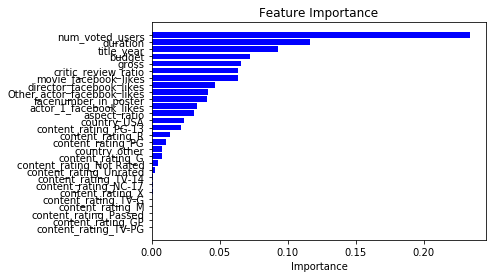

In [63]:
#feature importance
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
features=x.columns
importance = forest.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)),importance[indices],color='b',align ='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [127]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)

In [128]:
x_train

array([[3.44936709e-01, 2.45909091e-02, 4.61538462e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.16455696e-01, 0.00000000e+00, 3.32692308e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 7.72727273e-04, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.34177215e-01, 3.18181818e-04, 7.69230769e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48101266e-01, 1.81818182e-01, 8.07692308e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 3.68181818e-03, 1.15384615e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [121]:
def RF():
    global x_train,x_test,y_train,y_test
    
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    
    predictions = clf.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@RF.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
RF()

MAE=  0.5645706174591909
MSE=  0.5718415613910576
RMS=  0.7562020638632624

r_square: 0.5080177054936864

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                 6.920
1            7.1                 5.504
2            6.8                 6.174
3            8.5                 6.048
5            6.6                 6.650
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [123]:
def svr():
    global x_train,x_test,y_train,y_test
    svr = SVR(kernel='rbf')
    svr = svr.fit(x_train, y_train)
    
    predictions = svr.predict(x_test)
    
    
    df_output = pd.DataFrame()
    df_output['imdb_score'] = x['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@svr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
svr()

MAE=  0.6709105337977055
MSE=  0.8278489836400479
RMS=  0.9098620684697477

r_square: 0.28776243285782355

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.091394
1            7.1              6.432759
2            6.8              6.677064
3            8.5              6.285524
5            6.6              6.887305
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [124]:
def KNN():
    knn = KNeighborsRegressor()
    knn = knn.fit(x_train, y_train)
    
    predictions = knn.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
KNN()

MAE=  0.698736692689851
MSE=  0.8415806955287438
RMS=  0.9173770737972166

r_square: 0.2759483927833907

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                  7.48
1            7.1                  5.54
2            6.8                  6.64
3            8.5                  6.54
5            6.6                  6.74
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [125]:
def LR():
    lr = LinearRegression()
    lr = lr.fit(x_train, y_train)
    
    predictions = lr.predict(x_test)
    df_output = pd.DataFrame()
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
LR()

MAE=  0.6730357407306093
MSE=  0.7967052665789284
RMS=  0.8925834787732341

r_square: 0.314556843082069

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.146369
1            7.1              6.126544
2            6.8              6.563556
3            8.5              6.139367
5            6.6              6.924195
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [137]:
def LR():
    lm=LinearRegression()
    
    lm.fit(x_train,y_train)
    predictions=lm.predict(x_test)
    res = pd.DataFrame(predictions)
    res.index = X_test.index # its important for comparison
    res['predictions'] = predictions

    res.to_csv("prediction_results.csv")
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    r_square = metrics.r2_score(y_test,predictions)
    print('\nr_square:', r_square)
LR()

MAE=  0.6730357407306093
MSE=  0.7967052665789284
RMS=  0.8925834787732341

r_square: 0.314556843082069


In [152]:
def RF():
    global New_data,data_test
    global x_train,x_test,y_train,y_test
    global new_x_train,new_x_test,new_data
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    features = pd.DataFrame()
    features['Feature'] = x.columns
    features['Importance'] = clf.feature_importances_
    features.sort_values(by=['Importance'], ascending=False, inplace=True)
    features.set_index('Feature', inplace=True)
    selector = SelectFromModel(clf, prefit=True)
    train_reduced = selector.transform(x_train)
    new_x_train=pd.DataFrame(train_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    test_reduced = selector.transform(x_test)
    new_x_test=pd.DataFrame(test_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    new_reduced=selector.transform(x_test)
    new_data=pd.DataFrame(new_reduced,columns=['num_voted_users','duration' ,'title_year', 'budget','gross','critic_review_ratio','movie_facebook_likes','director_facebook_likes','Other_actor_facebbok_likes','facenumber_in_poster'])
    parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 5,
              'max_features': 'sqrt',
              'max_depth': 6}

    rf = RandomForestRegressor(**parameters)
    rf.fit(new_x_train, y_train)
    pred=rf.predict(new_x_test)
    
    
    return features[:5],new_x_train
    
    print("\nPredicted values on the New Data:\n\n",df_output)

In [31]:
RF()

NameError: name 'RF' is not defined